In [8]:
import numpy as np
import matplotlib.pyplot as plt

Steering Vector =  [ 1.        +0.j          0.24071447-0.97059597j -0.88411309-0.46727299j
 -0.6663521 +0.74563723j  0.5633119 +0.82624434j  0.93754675-0.34785929j
 -0.11194976-0.99371387j -0.99144261-0.13054333j]


Text(0.5, 1.0, 'Array Factor of a Linear Array')

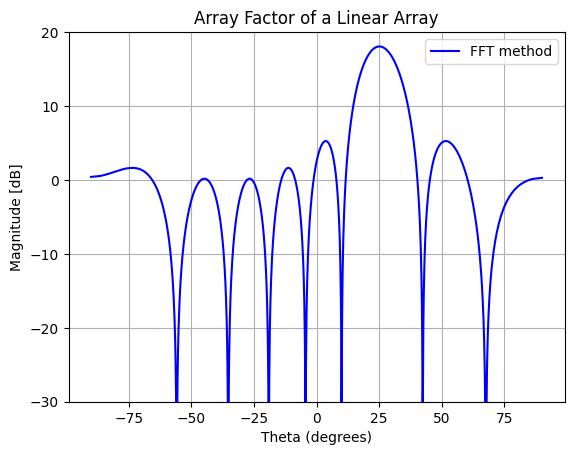

In [9]:
d = 0.5 # half wavelength spacing
Nr = 8 # number of elements in the array
theta = 25 # direction of arrival (feel free to change this, it's arbitrary)

# Steering vector
s = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(np.deg2rad(theta)))
print("Steering Vector = ", s)

w = s # Conventional, aka delay-and-sum, beamformer

num_points = 1024
theta_bins = np.arcsin(np.linspace(-1, 1, num_points))

# FFT method for generating the array factor
w = np.conj(w) # or else our answer will be negative/inverted
w_padded = np.concatenate((w, np.zeros(num_points - Nr))) # zero pad to N_fft elements to get more resolution in the FFT
w_fft_dB = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(w_padded)))**2) # magnitude of fft in dB
plt.plot(np.rad2deg(theta_bins), w_fft_dB, 'b', label='FFT method') # MAKE SURE TO USE RADIAN FOR POLAR
plt.legend() 
plt.ylim((-30, 20))
plt.xlabel('Theta (degrees)')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.title('Array Factor of a Linear Array')

Text(0.5, 1.0, 'Array Factor of a Linear Array')

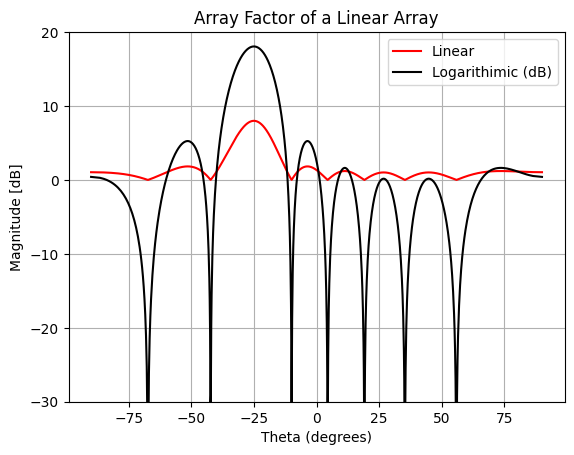

In [6]:
array_factor = np.zeros(num_points) # array factor for each theta bin
for i,theta_val in enumerate(theta_bins):
    # Calculate the steering vector for each theta bin
    s = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta_val))
    # Calculate the beam pattern for each theta bin
    array_factor[i] = np.abs(np.dot(np.conj(w), s))
    
plt.plot(np.rad2deg(theta_bins), array_factor, 'r', label = 'Linear')
plt.plot(np.rad2deg(theta_bins), 20*np.log10(array_factor), 'k', label='Logarithimic (dB)')
plt.legend() 
plt.ylim((-30, 20))
plt.xlabel('Theta (degrees)')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.title('Array Factor of a Linear Array')

 Visualize the beam pattern using a polar plot instead

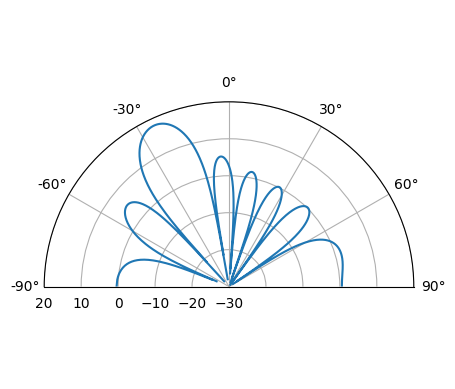

In [7]:
N_fft = 1024
w = np.conj(w) # or else our answer will be negative/inverted
w_padded = np.concatenate((w, np.zeros(N_fft - Nr))) # zero pad to N_fft elements to get more resolution in the FFT
w_fft_dB = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(w_padded)))**2) # magnitude of fft in dB
theta_bins = np.arcsin(np.linspace(-1, 1, N_fft)) # Map the FFT bins to angles in radians
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta_bins, w_fft_dB) # MAKE SURE TO USE RADIAN FOR POLAR
ax.set_theta_zero_location('N') # type: ignore # make 0 degrees point up
ax.set_theta_direction(-1) # type: ignore # increase clockwise
ax.set_thetamin(-90) # type: ignore # only show top half
ax.set_thetamax(90) # type: ignore
ax.set_ylim((-30, 20)) # because there's no noise, only go down 30 dB
plt.show()